##  Regresja liniowa

Regresja liniowa to tworzenie modeli przedstawiających wielkość, której wartość chcemy przewidzieć (zmienna zależna) jako kombinację liniową predyktorów (zmiennych zależnych).

Struktura modelu ma postać

$$\tilde{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 +\ldots+ \beta_n x_n$$

lub w formie macierzowej 

$$\tilde{\mathbf{y}} = \mathbf{[1\  X ]} \beta$$

gdzie wektor wartości zmiennych zależnych jest przewidywany na podstawie macierzy danych i wektora współczynników $\beta$.

Współczynnik $\beta_0$ w nomentkalturze anglojęzycznej jest nazywany *intercept* ponieważ jest to punkt przecięcia się z osią $y$ gdy wszystkie predyktory są równe 0.

Aby wyznaczyć parametry modelu liniowego potrzebujemy wektora danych uczących, tj. znanych nam wartości zmiennej zależnej  $\mathbf{y}$ oraz odpowiadająxcej mu macierzy predyktorów $\mathbf{X}$. Macierz predyktorów nosi nazwę *design matrix*, i bardzo użytyeczne do jej wyznaczenia (w oparciu o dane w forme dataframe) jest pakiet [patsy](https://patsy.readthedocs.io/en/latest/quickstart.html), a w szczególności funkcja ```dmatrices```.


Model regresyjny ma mocne umocowanie statystyczne, jednak w ramach zajęć będziemy traktować go machinistycznie jak jedną z metod uczenia maszynowego. Do tworzenia takich modeli służy klasa ```LinearRegression```

Do analizy regresji liniowej wykorzystywać będziemy pakiet ```scikit-learn``` oraz zawarte w nim klasy, głównie w modułach ```linear_model```, ```metrics``` oraz ```model_selection```. 

### Dane uczące i dane testowe

Zazwyczaj rozwiązując problem nie mamy dostępu do dodatkowych danych testowych uzupełniających nasze dane uczące. Dlatego też, popularną praktyką jest podzielenie posiadanego zbioru danych w sposób losowy na dwa zbiory: uczący i testowy. Do tego służy funkcja ```train_test_split``` z modułu ```model_selection```. 



### Zadanie 1
Na podstawie danych zawartych w pliku SCORES.csv wykonaj i oceń regresję liniową, gdzie Twoją daną niezależną (predyktorem) będą godziny poświęcone na przygotowanie, a wynikową uzyskane punkty. Wykonanie zadania powinno składać się z następujących kroków:
1. Zaimportowanie niezbędnych bibliotek w szczególności tych tworzących modele liniowe z "scikit-learn", a także biblioteki do operacji na danych oraz tworzenia wykresów.
2. Odczytaj dane z pliku SCORES.csv. Pomocne w interpretacji danych są metody: head(), describe(), shape.
3. Wykonaj wstępny wykres uzyskanych danych (typu "scatter")
4. Dokonaj podziału danych na zbiory danych niezależnych (wejściowe, X) oraz zaleznych (wyjściowe, y) dla swojego modelu, a następnie podziel zbiór na dane testowe i treningowe (30%)
5. Utwróz model regresji liniowej za pomocą sklearn.
6. Wypisz i przeanalizuj wyliczone wskaźniki dla modelu: coef_ oraz intercept_. Czym one są i do czego służą?
7. Wykorzystając stworozny model dokonaj predykcji dla części testowej X. Porównaj wynik (y_pred) z posiadanymi danymi (y_test).
8. Wykonaj wykres konfrontujący dane testowe (X_test, y_test; typu "scatter") oraz predykcje (X_test, y_pred; linia prosta)
9. Dokonaj walidacji uzyskanych predykcji wykorzystując metryki: średni błąd bezwzględny (Mean Absolute Error), błąd średniokwadratowy (Mean Squared Error) oraz pierwiastek błędu średniokwadratowego (Root Mean Squared Error).

Następnie utworzony skrypt wykorzystaj na danych zawartych w SBP.csv, gdzie predyktorem będzie wiek, a wynikiem ciśnienie (SBP). Czy uzyskane wyniki z modelu są równie zadowalające?

In [58]:
import sklearn
from sklearn import model_selection, metrics
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from patsy import dmatrices
import numpy as np

In [59]:
data = pd.read_csv("SCORES.csv")
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


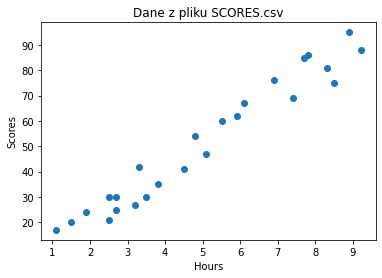

In [60]:
plt.scatter(data["Hours"], data["Scores"])
plt.title("Dane z pliku SCORES.csv")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

In [61]:
X = np.array(data["Hours"])
X = X[:, np.newaxis]
Y = np.array(data["Scores"])

X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, Y, test_size=0.3)

print(len(X), len(X_train), len(X_test))

25 17 8


In [63]:
lin_reg = LinearRegression().fit(X_train, Y_train)
print("\ncoef:", lin_reg.coef_)
print("intercept:", lin_reg.intercept_)


coef: [9.78551636]
intercept: 3.251723994249872



 [5.27847455 7.50103127 6.66454509 6.28654764 1.01372945 6.3998
 4.05662618 6.15785746]


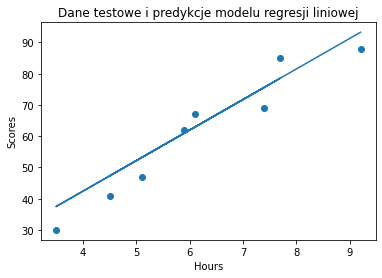

mean absolute error: 5.419826454717804
mean squared error: 33.05313975295164
root mean squared error: 5.749186007858125


In [64]:
Y_pred = lin_reg.predict(X_test)

print("\n", np.abs(Y_test-Y_pred))

plt.scatter(X_test, Y_test)
plt.plot(X_test, Y_pred)
plt.title("Dane testowe i predykcje modelu regresji liniowej")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

print("mean absolute error:", metrics.mean_absolute_error(Y_test, Y_pred))
print("mean squared error:", metrics.mean_squared_error(Y_test, Y_pred))
print("root mean squared error:", metrics.mean_squared_error(Y_test, Y_pred, squared=False))

   Age  SBP
0   60  117
1   61  120
2   74  145
3   57  129
4   63  132
5   68  130
6   66  127
7   77  163
8   63  136
9   54  115


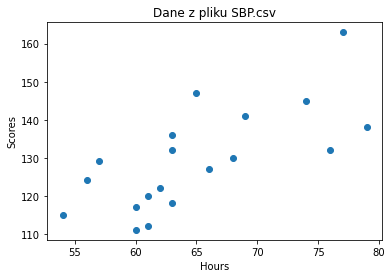


coef: [1.45555556]
intercept: 32.394871794871804

 [ 7.90512821 10.09401709 11.90512821  1.18376068 19.99401709  1.37264957]


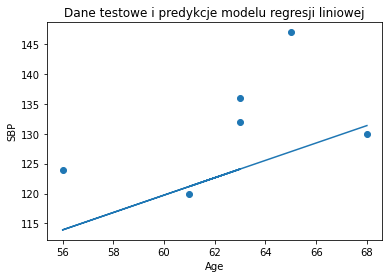

mean absolute error: 8.742450142450144
mean squared error: 118.19308106265386
root mean squared error: 10.871664134926808


In [70]:
data = pd.read_csv("SBP.csv")
print(data.head(10))

plt.scatter(data["Age"], data["SBP"])
plt.title("Dane z pliku SBP.csv")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

X = np.array(data["Age"])
X = X[:, np.newaxis]
Y = np.array(data["SBP"])


X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, Y, test_size=0.3)

lin_reg = LinearRegression().fit(X_train, Y_train)
print("\ncoef:", lin_reg.coef_)
print("intercept:", lin_reg.intercept_)

Y_pred = lin_reg.predict(X_test)

print("\n", np.abs(Y_test-Y_pred))

plt.scatter(X_test, Y_test)
plt.plot(X_test, Y_pred)
plt.title("Dane testowe i predykcje modelu regresji liniowej")
plt.xlabel("Age")
plt.ylabel("SBP")
plt.show()

print("mean absolute error:", metrics.mean_absolute_error(Y_test, Y_pred))
print("mean squared error:", metrics.mean_squared_error(Y_test, Y_pred))
print("root mean squared error:", metrics.mean_squared_error(Y_test, Y_pred, squared=False))


Błąd dla danych z pliku SBP.csv jest o wiele większy

### Zadanie 2
Na podstawie danych zawartych w pliku PETROL.csv wykonaj i oceń regresję liniową. Jako daną zależną wykorzystaj zużycie paliwa, a pozostałe - jako predyktory. Wykonanie zadania powinno składać się z kroków podobnych do tych z zadania poprzedniego.

Czy uzyskane wyniki predykcji modelu są dobre? Co mogło mieć pozytywny/negatywny wpływ na taki wynik?

In [86]:
data = pd.read_csv("PETROL.csv")
print(data.head(10))

   Podatek_paliwowy  Sredni_przychod  Utwardzone_autostrady  \
0               9.0             3571                   1976   
1               9.0             4092                   1250   
2               9.0             3865                   1586   
3               7.5             4870                   2351   
4               8.0             4399                    431   
5              10.0             5342                   1333   
6               8.0             5319                  11868   
7               8.0             5126                   2138   
8               8.0             4447                   8577   
9               7.0             4512                   8507   

   Procent_ludnosci_z_prawem_jazdy  Zuzycie_paliwa  
0                            0.525             541  
1                            0.572             524  
2                            0.580             561  
3                            0.529             414  
4                            0.544       

In [84]:
X = np.array(data[data.columns[:-1]])
Y = np.array(data[data.columns[-1]])
print(X.shape, Y.shape)

X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, Y, test_size=0.3)

lin_reg = LinearRegression().fit(X_train, Y_train)
print("\ncoef:", lin_reg.coef_)
print("intercept:", lin_reg.intercept_)

Y_pred = lin_reg.predict(X_test)

print("\n wartośc absolutna Y_pred - Y_test:")
print(np.abs(Y_test-Y_pred))

print("\nmean absolute error:", metrics.mean_absolute_error(Y_test, Y_pred))
print("mean squared error:", metrics.mean_squared_error(Y_test, Y_pred))
print("root mean squared error:", metrics.mean_squared_error(Y_test, Y_pred, squared=False))

(48, 4) (48,)

coef: [-2.70231063e+01 -6.05633743e-02 -1.86183013e-05  1.06745570e+03]
intercept: 419.7248240880107

 wartośc absolutna Y_pred - Y_test:
[132.27343888  18.60494471  26.41985326  38.93461539  30.43817857
  16.35531348   4.24620627  88.95325102 147.32599327  38.63770985
  41.13087611  21.54339767   2.58266272   4.34980304 283.32725506]

mean absolute error: 59.67489995374548
mean squared error: 8988.974794163427
root mean squared error: 94.81020406139535


Predykcje nie są zbyt dobre; uzyskane wartości błędów są o wiele większe niż poprzednio. Wpływ na to może mieć fakt, że predyktory to cztery zmienne, do których trudno może być dopasować jedną wartość.

### Regresja logistyczna

Naturalnym rozwojem modeli linowych, są uogólnione modele liniowe (*generalized linear models*). 

Ich przewodnią ideą jest to, że zamiast reprezentować zmienną zależną jako kombinację liniową niezależnych, staramy się stworzyć model liniowy pewnej funkcji zmiennej zależnej.

$$ f(y) =  \beta_0 + \beta_1 x_1 + \beta_2 x_2 +\ldots+ \beta_n x_n$$

wymaga się, aby funkcja ta była odwracalna, dzięki czemu 

$$ y = f^{-1} ( \beta_0 + \beta_1 x_1 + \beta_2 x_2 +\ldots+ \beta_n x_n)$$

Takie przekształcenie stosujemy wtedy, gdy zbiór wartości zmiennej zależnej nie jest całym zbiorem liczb rzeczywistych tylko jest w jakiś sposób ograniczony. Na przykład do przedziału $[0,1]$, do wartości dodatnich lub wartości całkowitych. W tens posób można wybrać funkcję $f$, której dziedziną jest zbiór wartości $y$ zaś obrazem jest zbiór liczb rzeczywistych.

Jedną z takich funkcji jest tzw. funkcja logistyczna, która odpowiada zbiorowi $[0,1]$ przez co często jest wykorzystywana do analizy prawdopodobieństwa przynależności do danej klasy, lub też inaczej jako klasyfikator.

W takiej sytuacji zmienne zależne powinny przyjmować wyłącznie wartości $0$ i $1$ co odpowiada temu czy dany punkt należy do interesującej klasy. Model logistyczny poznwala na określenie estymaty prawdopodobieństwa, czy punkt należy czy nie do danej klasy. 

Do tworzenia modeli logistycznyc służy klasa: ```LogisticRegression```

### Zadanie 3

Na podstawie danych zawartych w pliku HEART.csv wykonaj i oceń regresję logistyczną, gdzie Twoją daną zależną jest kolumna "num". Wykonanie zadania powinno składać się z następujących kroków:

1. Zaimportowanie niezbędnych bibliotek w szczególności tych tworzących modele liniowe z "scikit-learn", a także biblioteki do operacji na danych oraz tworzenia wykresów.
2. Odczytanie danych z pliku HEART.csv. Pomocne w interpretacji danych są metody: head(), describe(), shape.
3. Przetworzenie danych, tj: oznaczenie braku danych ("?") na NaN, usunięcię kolumn zawierających zbyt dużo brakujących danych (3 kolumny), usunięcie wierszy z brakującymi wartościami.
4. Zakoduj niezależne zmienne kategorialne np: jako wartości "dummy", za pomoca metody get_dummies(). Zmienne kategorialne to takie, które reprezentuja przynależność do kategorii. W przypadku naszych odfiltrowanych danych będą to kolumny: cp, restecg, fbs, sex, exang. Jako, że trzy ostatnie już zapisane są w formie 0 i 1 tylko cp i restecg wymagają tej operacji.
5. Dokonaj podziału danych na zbiory danych niezależnych (wejściowe, X) oraz zależnych (wyjściowe, y) dla swojego modelu, a następnie podziel zbiór na dane testowe i treningowe (20%).
6. Utwróz model regresji logistycznej.
7. Oceń wynik za pomocą dostępnych metryk (np: metody związane z modelem czy classification_report() z sklearn)

Możesz również spróbować ustandaryzować dane (np: poprzez skalowanie) po podziale na zbiory treningowy i testowy.

In [87]:
data = pd.read_csv("HEART.csv")
print(data.head(10))

   age  sex  cp trestbps chol fbs restecg thalach exang  oldpeak slope ca  \
0   28    1   2      130  132   0       2     185     0      0.0     ?  ?   
1   29    1   2      120  243   0       0     160     0      0.0     ?  ?   
2   29    1   2      140    ?   0       0     170     0      0.0     ?  ?   
3   30    0   1      170  237   0       1     170     0      0.0     ?  ?   
4   31    0   2      100  219   0       1     150     0      0.0     ?  ?   
5   32    0   2      105  198   0       0     165     0      0.0     ?  ?   
6   32    1   2      110  225   0       0     184     0      0.0     ?  ?   
7   32    1   2      125  254   0       0     155     0      0.0     ?  ?   
8   33    1   3      120  298   0       0     185     0      0.0     ?  ?   
9   34    0   2      130  161   0       0     190     0      0.0     ?  ?   

  thal  num         
0    ?           0  
1    ?           0  
2    ?           0  
3    6           0  
4    ?           0  
5    ?           0  
6    